In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 24.8 MB/s eta 0:00:00


In [ ]:
import easyocr
import torch

In [ ]:
reader = easyocr.Reader(['en'], gpu = True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
def ocr_scan(img_path: str) -> str:
  result = reader.readtext(str(img_path))
  recognized_text = " ".join(elem[1] for elem in result)
  return recognized_text


In [ ]:
img_path = '/content/drive/MyDrive/images/99.jpg'

print(ocr_scan(img_path))

3'' 0 ' :


## Image preprocessing

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
# open an image

img_file = '/content/drive/MyDrive/images/99.jpg'
img = cv2.imread(img_file)

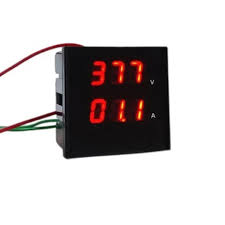

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img) # alternative of cv2.imshow()

In [ ]:
# invert the image
inverted_img = cv2.bitwise_not(img)
cv2.imwrite('inverted.jpg', inverted_img)


True

In [ ]:
print(ocr_scan('inverted.jpg'))

377 0


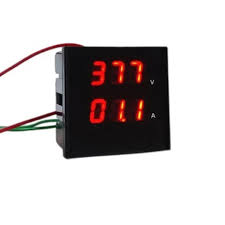

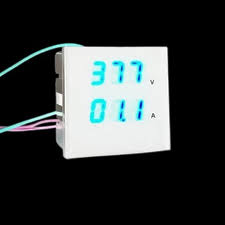

In [ ]:
cv2_imshow(img)
cv2_imshow(inverted_img)

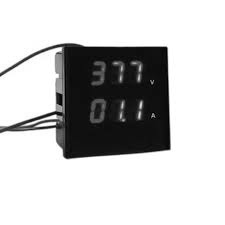

True

In [ ]:
# binarization
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)
cv2.imwrite('gray_img.jpg', gray_img)

In [ ]:
print(ocr_scan('gray_img.jpg'))

3'' 0 ':


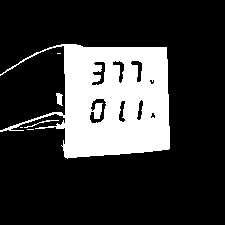

In [ ]:
thresh, bw_img = cv2.threshold(gray_img, 70, 255, cv2.THRESH_BINARY_INV) # can adjsut the values for contrast
cv2.imwrite('bw_img.jpg', bw_img)
cv2_imshow(bw_img)

In [ ]:
print(ocr_scan('bw_img.jpg'))

311 0


In [ ]:
# noise removal
import numpy as np
def noise_removal(img):
  kernel = np.ones((1,1), np.uint8)
  img =  cv2.dilate(img, kernel, iterations = 2)
  kernel = np.ones((1,1), np.uint8)
  img = cv2.erode(img, kernel, iterations = 2)
  img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
  img = cv2.medianBlur(img, 3)
  return img


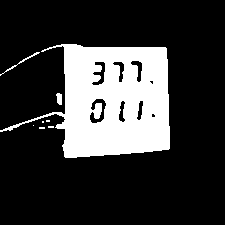

In [ ]:
noiseless_img = noise_removal(bw_img)
cv2.imwrite('noiseless_img.jpg', noiseless_img)
cv2_imshow(noiseless_img)

In [ ]:
print(ocr_scan('noiseless_img.jpg'))

3 11 0


In [ ]:
# dialation and erosion
def thin_font(img):
  img = cv2.bitwise_not(img)
  kernel = np.ones((2,2), np.uint8)
  img =  cv2.erode(img, kernel, iterations = 1)
  img = cv2.bitwise_not(img)
  return img


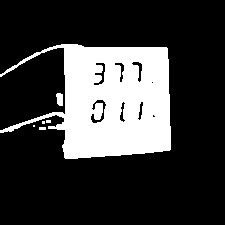

In [ ]:
eroded_img = thin_font(noiseless_img)
cv2.imwrite('eroded_img.jpg', eroded_img)
cv2_imshow(eroded_img)

In [ ]:
print(ocr_scan('eroded_img.jpg'))

3 1 1 0


In [ ]:
def thick_font(img):
  img = cv2.bitwise_not(img)
  kernel = np.ones((2,2), np.uint8)
  img =  cv2.dilate(img, kernel, iterations = 1)
  img = cv2.bitwise_not(img)
  return img

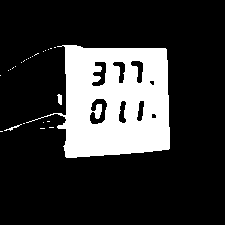

In [ ]:
dilated_img = thick_font(noiseless_img)
cv2.imwrite('dilated_img.jpg', dilated_img)
cv2_imshow(dilated_img)

In [ ]:
print(ocr_scan('dilated_img.jpg'))

311_ 0


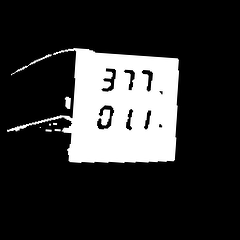

In [ ]:
# rotation and deskewing
from scipy import ndimage

rotated_img = ndimage.rotate(noiseless_img, -4) # manually
cv2.imwrite('rotated_img.jpg', rotated_img)
cv2_imshow(rotated_img)

In [ ]:
print(ocr_scan('rotated_img.jpg'))

311 0


In [ ]:
# removing borders

def remove_borders(img):
  # finds contours (outlines of objects) in the input image
  # cv2.RETR_EXTERNAL retrieves only the outer contours, and cv2.CHAIN_APPROX_SIMPLE compresses redundant points.
  contours, heiarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  # This sorts the found contours by their area in ascending order.
  cntsSorted = sorted(contours, key = lambda x: cv2.contourArea(x))
  #  This selects the largest contour
  cnt = cntsSorted[-1]
  # bounding box
  x, y, w, h = cv2.boundingRect(cnt)
  #  This crops the original image img using the calculated bounding box coordinates.
  crop = img[y:y+h, x:x+w]
  return crop

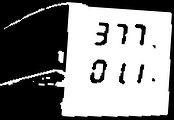

In [ ]:
borderless_img = remove_borders(rotated_img)

cv2.imwrite('borderless_img.jpg', borderless_img)
cv2_imshow(borderless_img)

In [ ]:
print(ocr_scan('borderless_img.jpg'))

311 0
